In [1]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [11]:
data_frame = pd.read_csv('epsdata.csv', delimiter=";", names=['time','field'], decimal='.')
print(data_frame)
E = data_frame['field']
t = data_frame['time']
t=t*10**(-12)

         time     field
0      4.0000 -0.001919
1      4.0195 -0.002837
2      4.0391 -0.003884
3      4.0586 -0.005025
4      4.0781 -0.006219
...       ...       ...
1019  23.9020  0.001239
1020  23.9220  0.000956
1021  23.9410  0.000686
1022  23.9610  0.000433
1023  23.9800  0.000202

[1024 rows x 2 columns]


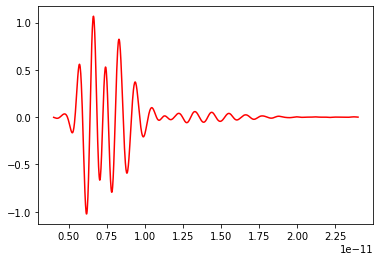

In [12]:
plt.plot(t,E, color="red")

Зададим F(omega):

In [13]:
Tp=0.5*10**(-12) # длительность импульса
z=10**(-3)       
c=3*10**(8)      # скорость света
d=1*10**(-3)     
w0=2*np.pi*10**(12)  #несущая частота
f=np.linspace(0.5*10**(12), 1.5*10**(12), 100)
w=np.zeros_like(f)
F_w=np.zeros_like(f)
for i in range(0, len(w)):
  w[i]=2*np.pi*f[i]
  F_w[i]=2*(np.pi)**(1/2)*Tp*np.exp(-(w[i]-w0)**2*Tp**2) # радиочастотный спектр прошедшего поля

/var/folders/r5/k4hcbzvx095bfcrzz376v4rh0000gn/T/ipykernel_87203/1701949476.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  T_omega=np.zeros_like(w, dtype = np.complex)


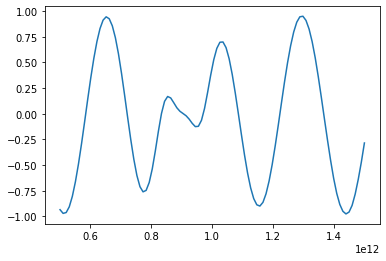

In [14]:
T_omega=np.zeros_like(w, dtype = np.complex)
for i in range(0, len(w)):
  e=0
  for n in range(1, len(t)): # вычисляем интеграл
    e=e+(t[n]-t[n-1])*(np.exp(1j*w[i]*t[n-1])*E[n-1]+np.exp(1j*w[i]*t[n])*E[n])
  T_omega[i]=(1/F_w[i])*np.exp(-1j*w[i]*z/c)*(1/2)*e # вычиляем коэффициент прохождения
plt.plot(f, T_omega.imag)

/var/folders/r5/k4hcbzvx095bfcrzz376v4rh0000gn/T/ipykernel_87203/2326268135.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n1=np.zeros_like(w, dtype = np.complex)
/var/folders/r5/k4hcbzvx095bfcrzz376v4rh0000gn/T/ipykernel_87203/2326268135.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  e=np.zeros_like(w, dtype =

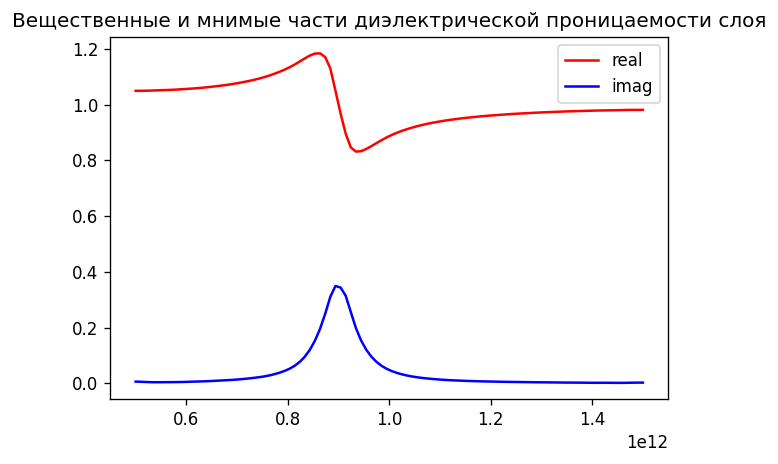

In [16]:
n1=np.zeros_like(w, dtype = np.complex)
e=np.zeros_like(w, dtype = np.complex)
for i in range(0, len(w)):
  k0=w[i]/c
  n=1
  F_n=(4*n)/((n+1)**2*np.exp(-1j*k0*n*d)-(n-1)**2*np.exp(1j*k0*n*d))-T_omega[i]
  while np.abs(F_n.real)>10**(-6):
    FFn=4*((n+1)*np.exp(-1j*k0*n*d)*(1-n+1j*k0*n*d*(n+1))+(n-1)*np.exp(1j*k0*n*d)*(n+1+1j*k0*n*d*(n-1)))
    n=n-F_n*(((n+1)**2*np.exp(-1j*k0*n*d)-(n-1)**2*(np.exp(1j*k0*n*d)))**2)/FFn
    F_n=(4*n)/((n+1)**2*np.exp(-1j*k0*n*d)-(n-1)**2*np.exp(1j*k0*n*d))-T_omega[i]
  n1[i]=n
  e[i]=n1[i]**(2)
figure, fig  = plt.subplots(dpi = 120)
plt.title('Вещественные и мнимые части диэлектрической проницаемости слоя')
plt.plot(f,e.real, color='r', label ='real')
plt.plot(f,e.imag, color='b', label ='imag')
fig.legend()